### Model on Surviving on Titanic

In [227]:
import pandas as pa
import numpy as np
import seaborn as sns

**Importing the dataset using pandas**

In [228]:
df = pa.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [230]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [231]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

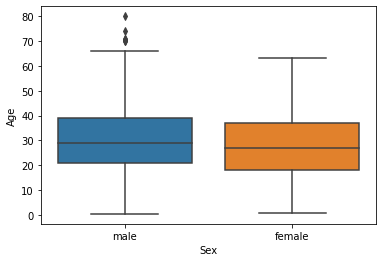

In [232]:
sns.boxplot(data=df, x='Sex', y='Age')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

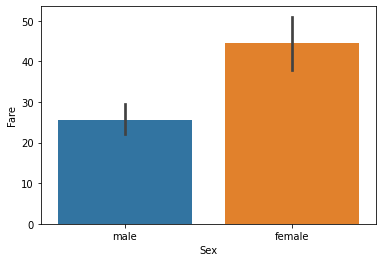

In [233]:
sns.barplot(x='Sex', y = 'Fare', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

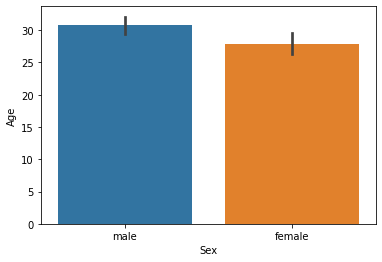

In [234]:
sns.barplot(x='Sex', y='Age', data=df)

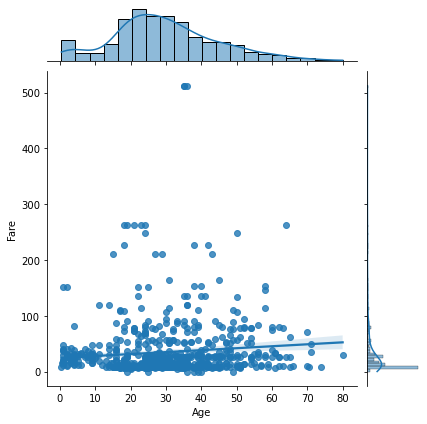

In [235]:
sns.jointplot(x = df['Age'], y = df['Fare'], kind = 'reg')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

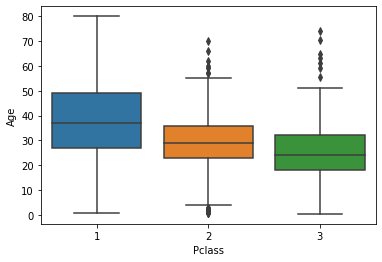

In [236]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

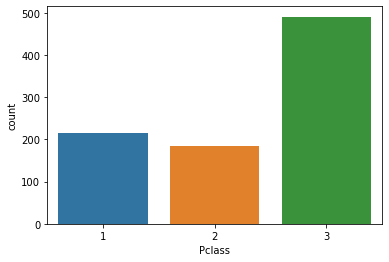

In [237]:
sns.countplot(data=df, x='Pclass')

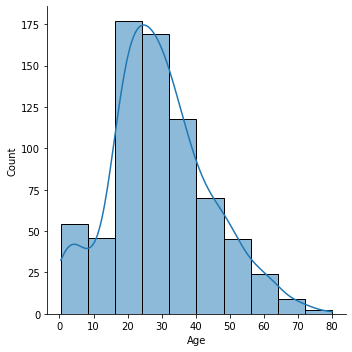

In [238]:
sns.displot(x=df['Age'], bins=10, kde=True)

In [239]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [240]:
def age(x):
    Age = x[0]
    Pclass = x[1]
    
    if pa.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
    

In [241]:
df['Age'] = df[['Age', 'Pclass']].apply(age, axis = 1)
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.087733,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.266489,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,37.000000,1.000000,0.000000,31.000000,NaN


#### Creating Dummy Values

In [242]:
df_new = pa.get_dummies(df, drop_first=True)
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [243]:
df_new.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Data Preprocessing

In [244]:
#the model couldn't compile with the current features. therefore preprocessing is needed.
import statsmodels.api as sm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [245]:
x = df_new.drop(['Survived'], axis = 1)
y = df_new['Survived']
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.087733,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.836071,13.266489,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [246]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [247]:
X1 = sm.add_constant(x)
model1 = sm.Logit(y, X1)
result1 = model1.fit()

result1.summary()

Optimization terminated successfully.
         Current function value: 0.438729
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3412
Time:                        17:29:41   Log-Likelihood:                -390.91
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.726e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5672      0.592      9.398      0.000       4.406       6.728
Pclass        -1.1866      0.150     -7.912      0.000      -1.480      -0.893
Age           -0.0431      0.008     -5.271      0.000      -0.059      -0.027
SibSp         -0.3408      0.110     -3.096      0.002      -0.557      -0.125
Parch         -0.0890      0.120     -0.744      0.457      -0.324       0.146
Fare           0.0018      0.002      0.737      0.461      -0.003       0.006
Sex_male      -2.7336      0.202    -13.559      0.000      -3.129      -2.338
Embarked_Q    -0.1251      0.382     -0.328      0.743      -0.874       0.624
Embarked_S    -0.3973      0.237     -1.678      0.093      -0.861       0.067
==============================================================================
"""

In [248]:
X2 = sm.add_constant(x.drop(['Embarked_Q', 'Fare', 'Parch'], axis = 1))
model2 = sm.Logit(y, X2)
result2 = model2.fit()

result2.summary()

Optimization terminated successfully.
         Current function value: 0.439312
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3403
Time:                        17:29:41   Log-Likelihood:                -391.43
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.496e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7070      0.525     10.869      0.000       4.678       6.736
Pclass        -1.2522      0.128     -9.801      0.000      -1.503      -1.002
Age           -0.0433      0.008     -5.319      0.000      -0.059      -0.027
SibSp         -0.3476      0.104     -3.337      0.001      -0.552      -0.143
Sex_male      -2.7041      0.195    -13.844      0.000      -3.087      -2.321
Embarked_S    -0.3924      0.199     -1.976      0.048      -0.782      -0.003
==============================================================================
"""

#### Building The Model

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
logistic_model = LogisticRegression()

In [251]:
logistic_model.fit(X2, y)

LogisticRegression()

#### Preparing the Test Data

In [252]:
df_test = pa.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [253]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [254]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [255]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(age, axis=1)
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,29.331340,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,12.918495,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,36.375000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [256]:
df_test.drop(['PassengerId', 'Fare', 'Name', 'Ticket', 'Cabin', 'Parch'], axis = 1, inplace=True)

In [257]:
df_test_new = pa.get_dummies(df_test, drop_first=True)
df_test_new.head()

,Pclass,Age,SibSp,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,1,1,0
1,3,47.0,1,0,0,1
2,2,62.0,0,1,1,0
3,3,27.0,0,1,0,1
4,3,22.0,1,0,0,1


In [258]:
df_test_new.drop(['Embarked_Q'], axis=1, inplace=True)

#### Predictions

In [259]:
df_req = sm.add_constant(df_test_new)
prediction = logistic_model.predict(df_req)
predict = pa.DataFrame(prediction, columns=['prediction'])
predict.head()

,prediction
0,0
1,0
2,0
3,0
4,1


#### Comparing Results

In [260]:
sub = pa.read_csv('gender_submission.csv')
sub_compare = sub.copy()
sub_compare['prediction'] = prediction
sub_compare.head(20)

,PassengerId,Survived,prediction
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0


In [261]:
sub_compare.tail(20)

,PassengerId,Survived,prediction
398,1290,0,0
399,1291,0,0
400,1292,1,1
401,1293,0,0
402,1294,1,1
403,1295,0,1
404,1296,0,0
405,1297,0,0
406,1298,0,0
407,1299,0,0


In [262]:
from sklearn.metrics import classification_report, confusion_matrix

In [263]:
confusion_matrix(sub_compare['Survived'], prediction)

array([[250,  16],
       [ 12, 140]])

In [264]:
classification_report(sub_compare['Survived'],prediction)

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95       266\n           1       0.90      0.92      0.91       152\n\n    accuracy                           0.93       418\n   macro avg       0.93      0.93      0.93       418\nweighted avg       0.93      0.93      0.93       418\n'

#### Submission

In [265]:
Final_Submission = sub_compare.drop('Survived', axis = 1)
Final_Submission.rename({'prediction':'Survived'}, axis='columns', inplace=True)
Final_Submission.to_csv('Submission.csv', index = False)